#### Jupyter notebooks

This is a [Jupyter](http://jupyter.org/) notebook using Python.  You can install Jupyter locally to edit and interact with this notebook.

# Linear Algebra

You have all seen basic linear algebra before, but this will summarize some different ways of thinking about the fundamental operations.  It also presents concepts in a different order than Sauer's book.

Linear algebra is the study of linear transformations on vectors, which represent points in a finite dimensional space.  The matrix-vector product $y = A x$ is a linear combination of the columns of $A$.  The familiar definition,

$$ y_i = \sum_j A_{i,j} x_j $$

can also be viewed as

$$ y = \Bigg[ A_{:,0} \Bigg| A_{:,1} \Bigg| \dotsm \Bigg] \begin{bmatrix} x_0 \\ x_1 \\ \vdots \end{bmatrix}
= \Bigg[ A_{:,0} \Bigg] x_0 + \Bigg[ A_{:,1} \Bigg] x_1 + \dotsb . $$

The notation $A_{i,j}$ corresponds to the Python syntax `A[i,j]` and the colon `:` means the entire range (row or column).  So $A_{:,j}$ is the $j$th column and $A_{i,:}$ is the $i$th row.  The corresponding Python syntax is `A[:,j]` and `A[i,:]`.

In [20]:
%matplotlib notebook
import numpy
from matplotlib import pyplot

def matmult1(A, x):
    """Entries of y are dot products of rows of A with x"""
    y = numpy.zeros_like(A[:,0])
    for i in range(len(A)):
        row = A[i,:]
        for j in range(len(row)):
            y[i] += row[j] * x[j]
    return y

A = numpy.array([[1,2],[3,5],[7,11]])
x = numpy.array([10,20])
matmult1(A, x)

array([ 50, 130, 290])

In [21]:
def matmult2(A, x):
    """Same idea, but more compactly"""
    y = numpy.zeros_like(A[:,0])
    for i,row in enumerate(A):
        y[i] = row.dot(x)
    return y

matmult2(A, x)

array([ 50, 130, 290])

In [22]:
def matmult3(A, x):
    """y is a linear expansion of the columns of A"""
    y = numpy.zeros_like(A[:,0])
    for j,col in enumerate(A.T):
        y += col * x[j]
    return y

matmult3(A, x)

array([ 50, 130, 290])

In [23]:
# We will use this version
A.dot(x)

array([ 50, 130, 290])

### Some common terminology

* The **range** of $A$ is the space spanned by its columns.  This definition coincides with the range of a function $f(x)$ when $f(x) = A x$.
* The **nullspace** of $A$ is the space of vectors $x$ such that $A x = 0$.
* The **rank** of $A$ is the dimension of its range.
* A matrix has **full rank** if the nullspace of either $A$ or $A^T$ is empty (only the 0 vector).  Equivalently, if all the columns of $A$ (or $A^T$) are linearly independent.
* A **nonsingular** (or **invertible**) matrix is a square matrix of full rank.  We call the inverse $A^{-1}$ and it satisfies $A^{-1} A = A A^{-1} = I$.

$\DeclareMathOperator{\rank}{rank} \DeclareMathOperator{\null}{null} $
If $A \in \mathbb{R}^{m\times m}$, which of these doesn't belong?
1. $A$ has an inverse $A^{-1}$
2. $\rank (A) = m$
3. $\null(A) = \{0\}$
4. $A A^T = A^T A$
5. $\det(A) \ne 0$
6. $A x = 0$ implies that $x = 0$

When we write $x = A^{-1} y$, we mean that $x$ is the unique vector such that $A x = y$.
(It is rare that we explicitly compute a matrix $A^{-1}$, though it's not as "bad" as people may have told you.)
A vector $y$ is equivalent to $\sum_i e_i y_i$ where $e_i$ are columns of the identity.
Meanwhile, $x = A^{-1} y$ means that we are expressing that same vector $y$ in the basis of the columns of $A$, i.e., $\sum_i A_{:,i} x_i$.

### Vandermonde matrices

A Vandermonde matrix is one whose columns are functions evaluated at discrete points.

shape = (50, 4)


<IPython.core.display.Javascript object>


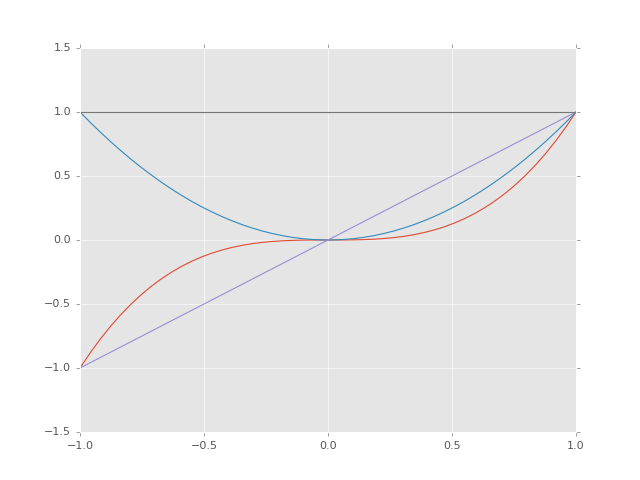

In [54]:
x = numpy.linspace(-1,1)
A = numpy.array([x**3, x**2, x, 1+0*x]).T
print('shape =', A.shape)  # This is a tall matrix with 4 columns
pyplot.figure()
pyplot.plot(x, A)
pyplot.ylim((-1.5,1.5))
pyplot.style.use('ggplot')
pyplot.show()

* This type of matrix is very common; we can also create it with `numpy.vander`.

We can evaluate polynomials using matrix-vector multiplication.
For example,
$$ 5x^3 - 3x = \Bigg[ x^3 \Bigg|\, x^2 \Bigg|\, x \,\Bigg|\, 1 \Bigg] \begin{bmatrix}5 \\ 0 \\ -3 \\ 0 \end{bmatrix} . $$

<IPython.core.display.Javascript object>


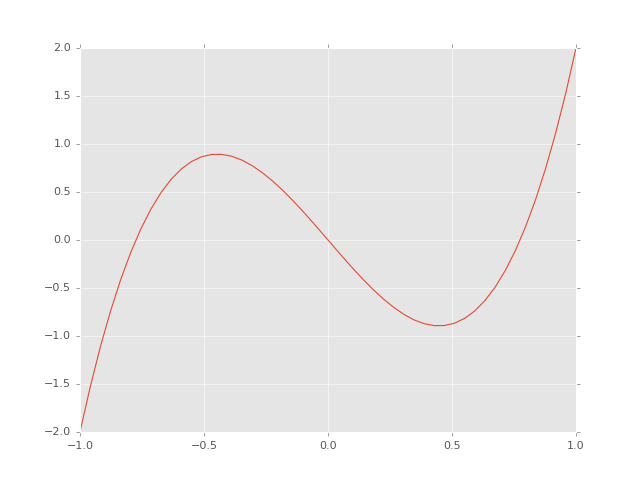

In [48]:
pyplot.figure()
p = numpy.array([5,0,-3,0])
pyplot.plot(x, A.dot(p))

Now suppose we know the value of a polynomial at a few points.
We can use the Vandermonde matrix to find a polynomial through those points.

<IPython.core.display.Javascript object>


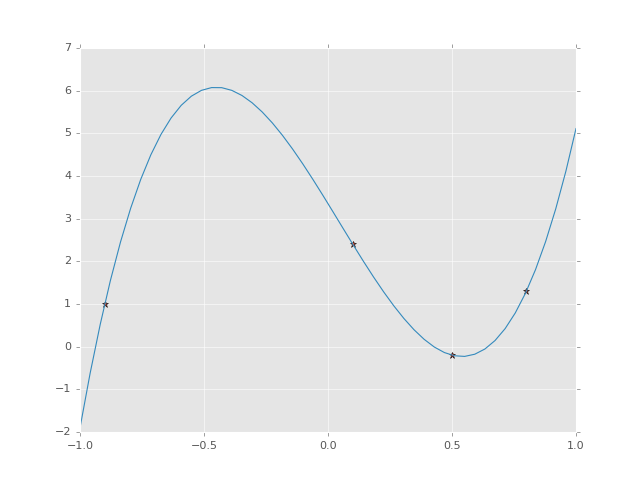

B = [[-0.729  0.81  -0.9    1.   ]
 [ 0.001  0.01   0.1    1.   ]
 [ 0.125  0.25   0.5    1.   ]
 [ 0.512  0.64   0.8    1.   ]] 
p = [ 12.98319328  -1.74789916  -9.47605042   3.35210084]


In [52]:
x1 = numpy.array([-0.9, 0.1, 0.5, 0.8])  # points where we know values
y = numpy.array([1, 2.4, -0.2, 1.3])     # values at those points
pyplot.figure()
pyplot.plot(x1, y, '*')
B = numpy.vander(x1)                     # Vandermonde matrix at the known points
p = numpy.linalg.solve(B, y)             # Compute the polynomial coefficients
pyplot.plot(x, A.dot(p))                 # Plot the polynomial evaluated at all points
print('B =', B, '\np =', p)

Evidently $p(x) = 12.983 x^3 - 1.748 x^2 - 9.476 x + 3.352$ is the unique cubic polynomial that interpolates those points.
Applying $B^{-1}$ converted from the values at the marked points to the polynomial coefficients.

## Inner products and orthogonality

The **inner product**
$$ x^T y = \sum_i x_i y_i $$
of vectors (or columns of a matrix) tell us about their magnitude and about the angle.
The **norm** is induced by the inner product,
$$ \lVert x \rVert = x^T x $$
and the angle $\theta$ is defined by
$$ \cos \theta = \frac{x^T y}{\lVert x \rVert \, \lVert y \rVert} . $$
Inner products are **bilinear**, which means that they satisfy some convenient algebraic properties
$$ \begin{split}
(x + y)^T z &= x^T z + y^T z \\
x^T (y + z) &= x^T y + x^T z \\
(\alpha x)^T (\beta y) &= \alpha \beta x^T y \\
\end{split} . $$
The pairwise inner products between two sets of vectors can be expressed by collecting the sets as columns in matrices and writing $A = X^T Y$ where $A_{i,j} = x_i^T y_j$.
It follows from this definition that
$$ (X^T Y)^T = Y^T X .$$

### Orthogonal matrices

If $x^T y = 0$ then we say $x$ and $y$ are **orthogonal** (or "$x$ is orthogonal to $y$").
A vector is said to be **normalized** if $\lVert x \rVert = 1$.
If $x$ is orthogonal to $y$ and $\lVert x \rVert = \lVert y \rVert = 1$ then we say $x$ and $y$ are **orthonormal**.
A matrix with orthonormal columns is said to be an **orthogonal matrix**.
We typically use $Q$ or $U$ and $V$ for matrices that are known/constructed to be orthogonal.
Orthogonal matrices are always full rank -- the columns are linearly independent.
The inverse of a *square* orthogonal matrix is its transpose:
$$ Q^T Q = Q Q^T = I . $$
Orthogonal matrices are a powerful building block for robust numerical algorithms.

<IPython.core.display.Javascript object>


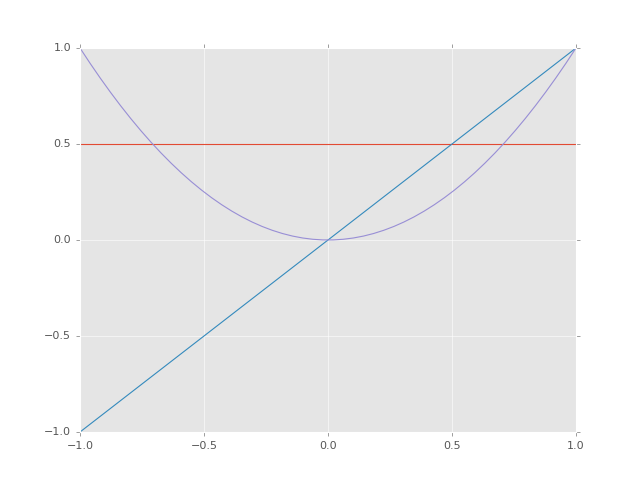

In [70]:
# Make some polynomials
q0 = A.dot(numpy.array([0,0,0,.5]))  # 1
q1 = A.dot(numpy.array([0,0,1,0]))  # x
q2 = A.dot(numpy.array([0,1,0,0]))  # x^2

pyplot.figure()
pyplot.plot(x, numpy.array([q0, q1, q2]).T)

In [75]:
# Inner products of even and odd functions

q0 = q0 / numpy.linalg.norm(q0)
q1.dot(q0), q2.dot(q0), q2.dot(q1)

(-9.7144514654701197e-16, 2.4532276081982243, -3.5527136788005009e-15)

<IPython.core.display.Javascript object>


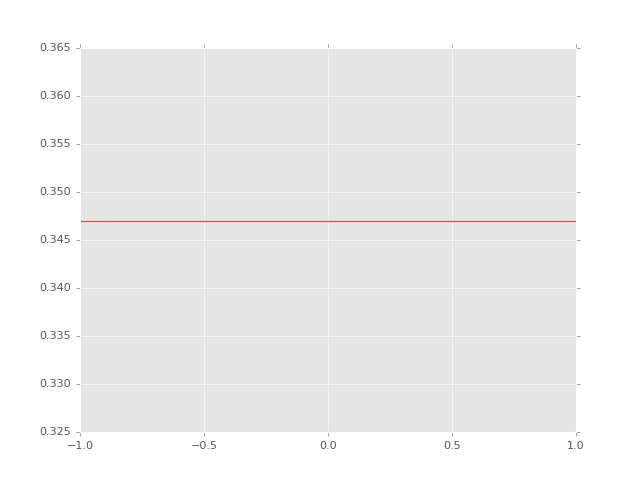

In [78]:
# What is the constant component of q2?

pyplot.figure()
pyplot.plot(x, q2.dot(q0)*q0)

In [85]:
# Let's project that away so that q2 is orthogonal to q0

q2 = q2 - q2.dot(q0)*q0

Q = numpy.array([q0, q1, q2]).T
print(Q.T.dot(Q))
#pyplot.figure()
#pyplot.plot(x, Q)

[[  1.00000000e+00  -9.71445147e-16   0.00000000e+00]
 [ -9.71445147e-16   1.73469388e+01  -9.99200722e-16]
 [  0.00000000e+00  -9.99200722e-16   4.80888065e+00]]


## Gram-Schmidt Orthogonalization

Given a collection of vectors (columns of a matrix), we can make them orthogonal by applying the above procedure one column at a time.

[[  1.00000000e+00   1.38777878e-17   1.38777878e-17   0.00000000e+00]
 [  1.38777878e-17   1.00000000e+00   2.77555756e-17  -3.46944695e-17]
 [  1.38777878e-17   2.77555756e-17   1.00000000e+00  -7.28583860e-17]
 [  0.00000000e+00  -3.46944695e-17  -7.28583860e-17   1.00000000e+00]]


<IPython.core.display.Javascript object>


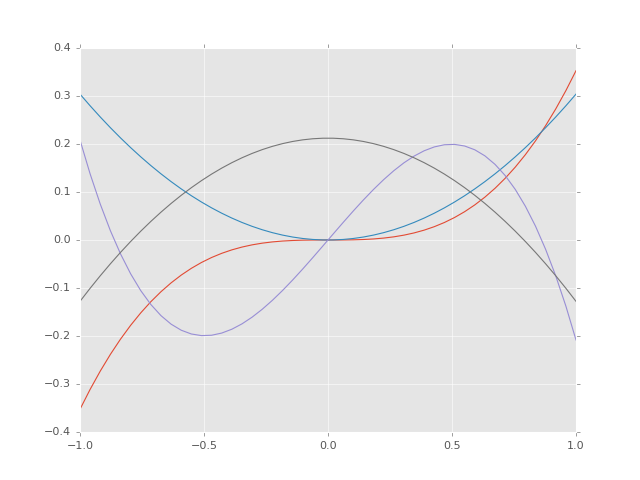

In [91]:
def gram_schmidt_naive(X):
    Q = numpy.zeros_like(X)
    for i in range(len(Q.T)):
        v = X[:,i]
        for j in range(i):
            r = v.dot(Q[:,j])
            v -= r * Q[:,j]
        Q[:,i] = v / numpy.linalg.norm(v)
    return Q

Q = gram_schmidt_naive(A)
print(Q.T.dot(Q))
pyplot.figure()
pyplot.plot(x, Q)

<IPython.core.display.Javascript object>


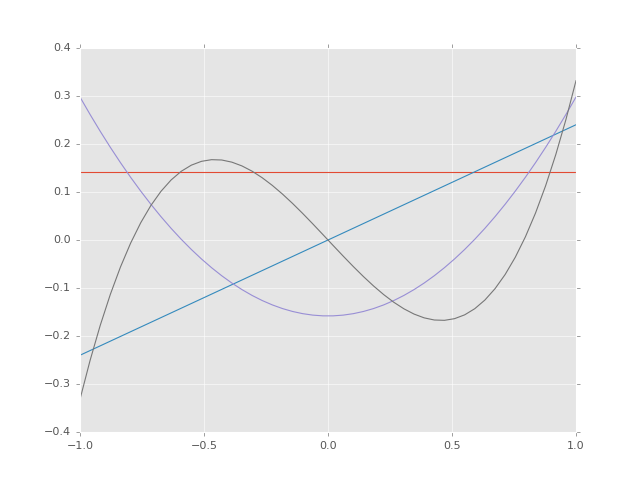

In [89]:
Q = gram_schmidt_naive(numpy.vander(x, 4, increasing=True))
pyplot.figure()
pyplot.plot(x, Q)